# 绘制模型的复杂度曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

/home/crystal/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
mydata = datasets.load_boston()
X = mydata.data
X.shape

(506, 13)

In [3]:
y = mydata.target
y.shape

(506,)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

/home/crystal/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


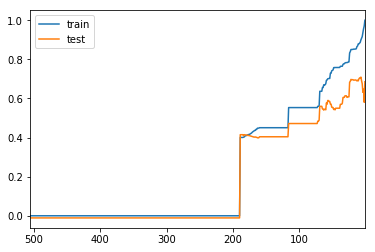

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

maxSampleLeaf = 506
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(506, 1)
plt.legend()
plt.show()

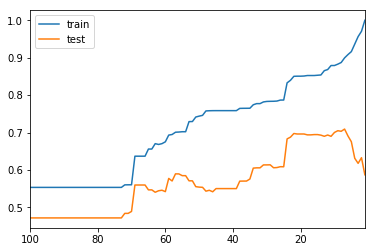

In [7]:
maxSampleLeaf = 100
train_scores = []
test_scores = []
for i in range(1, maxSampleLeaf+1):
    dt_reg = DecisionTreeRegressor(min_samples_leaf=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(1, maxSampleLeaf+1)], train_scores, label="train")
plt.plot([i for i in range(1, maxSampleLeaf+1)], test_scores, label="test")
plt.xlim(maxSampleLeaf, 1)
plt.legend()
plt.show()

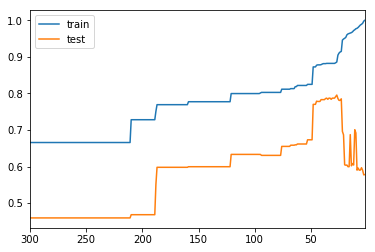

In [8]:

maxSamplesSplit = 300
train_scores = []
test_scores = []
for i in range(2, maxSamplesSplit+1):
    dt_reg = DecisionTreeRegressor(min_samples_split=i)
    dt_reg.fit(X_train, y_train)
    y_train_predict = dt_reg.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_predict))
    test_scores.append(dt_reg.score(X_test, y_test))
    
plt.plot([i for i in range(2, maxSamplesSplit+1)], train_scores, label="train")
plt.plot([i for i in range(2, maxSamplesSplit+1)], test_scores, label="test")
plt.xlim(maxSamplesSplit, 2)
plt.legend()
plt.show()